In [3]:
#|default_exp app

# Dogs-Cats Model

In [4]:
#|export
from fastai.vision.all import *
import gradio as gr

def is_cat(x) -> bool:
    return x[0].isupper()


In [6]:
# from fastai.vision.all import *
# path = untar_data(URLs.PETS)
# dls = ImageDataLoaders.from_name_re(path, get_image_files(path/'images'), pat='(.+)_\d+.jpg', item_tfms=Resize(460), batch_tfms=aug_transforms(size=224, min_scale=0.75))

In [24]:
# from itertools import islice
# from pathlib import Path
# import shutil
# from random import shuffle
# paths = list((path / "images").iterdir())
# shuffle(paths)
# out_dir = Path("examples")
# if not path.exists:
#     out_dir.mkdir(exist_ok=True)
#     for p in paths[:6]:
#         shutil.copy(p, out_dir / p.name)

[Path('/Users/jrnold/.fastai/data/oxford-iiit-pet/images/english_setter_15.jpg'), Path('/Users/jrnold/.fastai/data/oxford-iiit-pet/images/havanese_129.jpg'), Path('/Users/jrnold/.fastai/data/oxford-iiit-pet/images/Bengal_102.jpg'), Path('/Users/jrnold/.fastai/data/oxford-iiit-pet/images/japanese_chin_83.jpg'), Path('/Users/jrnold/.fastai/data/oxford-iiit-pet/images/chihuahua_43.jpg'), Path('/Users/jrnold/.fastai/data/oxford-iiit-pet/images/Sphynx_143.jpg')]


In [25]:
from pathlib import Path
example_dir = Path("examples")
example_images = list(example_dir.iterdir())
print(example_images)

[Path('examples/Bengal_102.jpg'), Path('examples/havanese_129.jpg'), Path('examples/Sphynx_143.jpg'), Path('examples/japanese_chin_83.jpg'), Path('examples/chihuahua_43.jpg'), Path('examples/english_setter_15.jpg')]


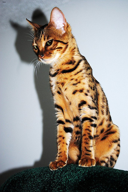

In [28]:
im = PILImage.create(str(example_images[0]))
im.thumbnail((192, 192))
im

In [29]:
#|export
learn = load_learner("model.pkl")

In [31]:
%time learn.predict(im)

CPU times: user 196 ms, sys: 25.4 ms, total: 221 ms
Wall time: 82.8 ms


('True', TensorBase(1), TensorBase([1.6575e-09, 1.0000e+00]))

In [30]:
learn.predict(im)

('True', TensorBase(1), TensorBase([1.6575e-09, 1.0000e+00]))

In [32]:
#|export
categories = ("Dog", "Cat")

def classify_image(img):
    _, _, probs = learn.predict(img)
    return dict(zip(categories, [float(p) for p in probs]))

In [33]:
classify_image(im)

{'Dog': 1.6574918104694802e-09, 'Cat': 1.0}

In [1]:
#|export
image = gr.inputs.Image(shape=(192, 192))
label = gr.outputs.Label()
examples = example_images
intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=True)


NameError: name 'gr' is not defined

In [3]:
from nbdev import nbdev_export
nbdev_export(".")

InterpolationMissingOptionError: Bad value substitution: option 'lib_name' in section 'DEFAULT' contains an interpolation key 'repo' which is not a valid option name. Raw value: '%(repo)s'